In [10]:
import numpy as np
import os
import random
import glob
import pandas as pd
import time
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_covtype
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.io import arff
from sklearn.datasets import fetch_openml

In [11]:
%run 'common.ipynb'

In [85]:
# Shared variables
OUTPUT_FOLDER = 'csv_files'
FEATURE_FOLDER = 'features'
TEST_COUNT = 500

In [86]:
# %run covertype.ipynb
%run kdd.ipynb

['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']
Normal class:  0    smurf.
Name: attack, dtype: object
Feature names:  ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_

In [87]:
# Should already be one hot encoded and label encoded
all_df.head()

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
2,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,16
3,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,28
4,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,28


In [55]:
# Create a folder to save the CSVs
remove_files_from_directory(OUTPUT_FOLDER)
remove_files_from_directory(FEATURE_FOLDER)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
os.makedirs(FEATURE_FOLDER, exist_ok=True)

All files in csv_files have been removed.
All files in features have been removed.


In [57]:
# Save all data as csv
all_df.to_csv('all_data.csv' ,index = False)

In [58]:
# Get X and y from all_df
X_df = all_df.drop(columns=[TARGET_COLUMN])
y_df = all_df[TARGET_COLUMN]

# Split the data into training and test sets
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X_df, y_df, test_size=0.2, random_state=42)
print(X_train_df.shape, X_test_df.shape, y_train_df.shape, y_test_df.shape)

(248823, 117) (62206, 117) (248823,) (62206,)


In [59]:
# Concatenate X_train and y_train along the columns (axis=1)
X_y_train_df = pd.concat([X_train_df, y_train_df], axis=1)
X_y_train_df.head()

,duration,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
147391,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231,1.00,0.00,0.02,0.01,0.0,0.0,0.0,0.0,16
107622,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,0.07,0.06,0.00,0.00,0.0,0.0,1.0,1.0,14
53448,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,27
3099,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,27
208489,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,27


In [60]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
X_train_scaled_df = X_train_df.copy()
X_train_scaled_df[NUMERICAL_COLUMNS] = scaler.fit_transform(X_train_scaled_df[NUMERICAL_COLUMNS])
# print('X_train_scaled_df', X_train_scaled_df)

# Use the same scaler to transform X_test
X_test_scaled_df = X_test_df.copy()
X_test_scaled_df[NUMERICAL_COLUMNS] = scaler.transform(X_test_scaled_df[NUMERICAL_COLUMNS])
# print('X_test_scaled_df', X_test_scaled_df)

In [72]:
# Loop through each cover type and create a dataset
benign = 2359289
abnormal_type_counts = all_df[TARGET_COLUMN].value_counts()
abnormal_type_dict = abnormal_type_counts.to_dict()
print('abnormal_type_dict', abnormal_type_dict)

benign_ratio = 2  # Adjust this ratio as needed
min_benign_samples = 50  # Ensure at least 50 benign samples are always included

for label, name in TARGET_DICT.items():
    if label == NORMAL_TARGET:
        continue  # Skip the normal target
    
    a, b = 0, 0  # Track abnormal and benign sample counts
    
    # Open the output file for writing
    output_path = os.path.join(OUTPUT_FOLDER, f"{name}.csv")
    with open(output_path, "w") as ths:
        ths.write(','.join(main_labels) + "\n")
        
        # Calculate the number of benign samples based on the fixed ratio
        abnormal_count = abnormal_type_dict[label]
        benign_num = max(min(int(abnormal_count * benign_ratio), benign), min_benign_samples)
        # print(f'Creating {name}.csv with {benign_num} benign samples and {abnormal_count} abnormal samples.')

        # Collect normal (benign) rows and abnormal rows
        benign_rows = []
        abnormal_rows = []

        # Read all_data.csv line by line and collect rows
        with open("all_data.csv", "r") as file:
            for i, line in enumerate(file):
                if i == 0:
                    continue  # Skip the header row
                k = line.strip().split(",")  # Strip newline and split the line
                
                # Collect normal rows
                if int(k[-1]) == NORMAL_TARGET:
                    benign_rows.append(line)
                
                # Collect abnormal rows that match the current label
                elif int(k[-1]) == label:
                    abnormal_rows.append(line)

        # Randomly sample benign rows
        if len(benign_rows) > benign_num:
            benign_rows = random.sample(benign_rows, benign_num)
        else:
            benign_rows = random.sample(benign_rows, len(benign_rows))  # Shuffle if fewer than required

        # Concatenate benign and abnormal rows
        combined_rows = benign_rows + abnormal_rows
        
        # Shuffle the combined rows
        random.shuffle(combined_rows)

        # Write the shuffled rows to the output file
        for row in combined_rows:
            ths.write(row)

        # Print number of rows written
        b = len(benign_rows)
        a = len(abnormal_rows)
        print(f"{name}.csv created with {a + b} rows. ({b} benign and {a} abnormal rows)")

print("All datasets created successfully!")

abnormal_type_dict {27: 164091, 16: 60593, 14: 58001, 28: 7741, 10: 5000, 4: 4367, 29: 2406, 25: 1633, 33: 1602, 1: 1098, 11: 1053, 0: 794, 21: 759, 24: 736, 20: 354, 7: 306, 5: 158, 19: 87, 15: 84, 2: 22, 12: 18, 13: 17, 26: 17, 22: 16, 23: 13, 37: 13, 31: 12, 35: 9, 8: 9, 36: 4, 3: 3, 9: 2, 17: 2, 32: 2, 34: 2, 18: 2, 30: 2, 6: 1}
Creating apache2.csv with 1588 benign samples and 794 abnormal samples.
apache2.csv created with 2382 rows. (1588 benign and 794 abnormal rows)
Creating back.csv with 2196 benign samples and 1098 abnormal samples.
back.csv created with 3294 rows. (2196 benign and 1098 abnormal rows)
Creating buffer_overflow.csv with 50 benign samples and 22 abnormal samples.
buffer_overflow.csv created with 72 rows. (50 benign and 22 abnormal rows)
Creating ftp_write.csv with 50 benign samples and 3 abnormal samples.
ftp_write.csv created with 53 rows. (50 benign and 3 abnormal rows)
Creating guess_passwd.csv with 8734 benign samples and 4367 abnormal samples.
guess_passwd.

In [70]:
# tdf = pd.read_csv('csv_files/smurf.csv')
# tdf['attack'].unique()

array([27])

csv_files ['portsweep.csv', 'processtable.csv', 'phf.csv', 'loadmodule.csv', 'httptunnel.csv', 'mscan.csv', 'buffer_overflow.csv', 'sendmail.csv', 'imap.csv', 'back.csv', 'smurf.csv', 'ipsweep.csv', 'udpstorm.csv', 'ps.csv', 'neptune.csv', 'teardrop.csv', 'pod.csv', 'warezmaster.csv', 'named.csv', 'xterm.csv', 'snmpguess.csv', 'xsnoop.csv', 'rootkit.csv', 'ftp_write.csv', 'snmpgetattack.csv', 'saint.csv', 'sqlattack.csv', 'land.csv', 'perl.csv', 'apache2.csv', 'guess_passwd.csv', 'xlock.csv', 'nmap.csv', 'worm.csv', 'multihop.csv', 'satan.csv', 'mailbomb.csv']
csv file portsweep.csv
importances [6.76704189e-05 3.04901634e-04 3.92163066e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.34774197e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.90936487e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.67852063e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0

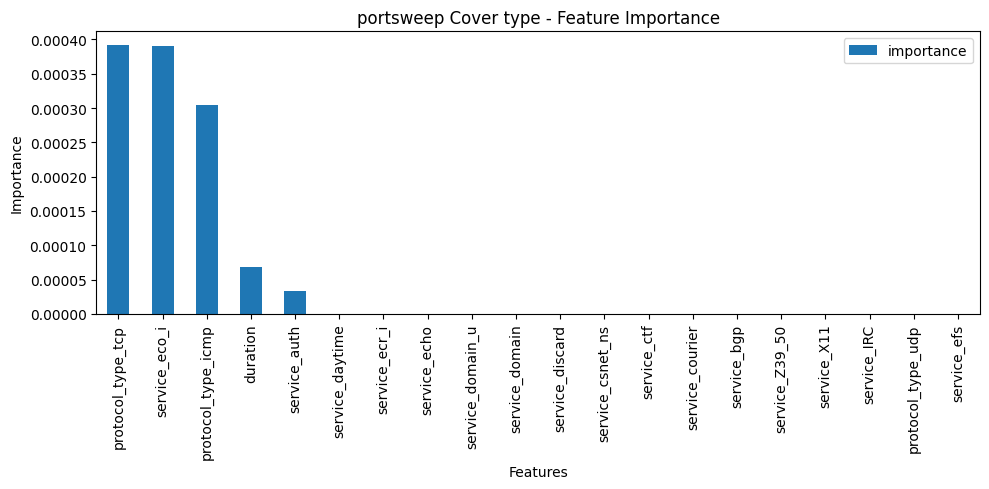

-----------------------------------------------------------------------------------------------




csv file processtable.csv
importances [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

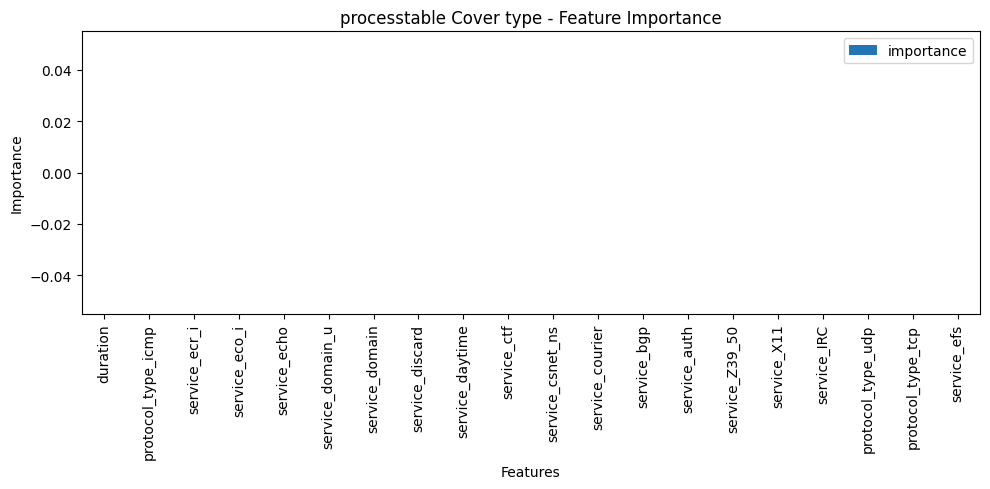

-----------------------------------------------------------------------------------------------




csv file phf.csv
importances [0.         0.00195705 0.00391483 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.07722176 0.
 0.         0.         0.         0.         0.         0.
 0.07495607 0.         0.10039716 0.         0.         0.
 0.         0.16441707 0.         0.         

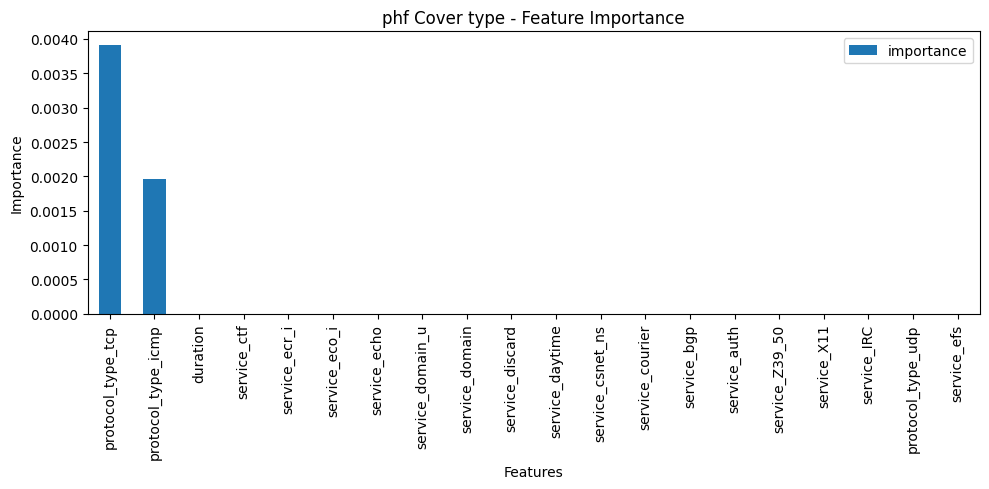

-----------------------------------------------------------------------------------------------




csv file loadmodule.csv
importances [0.09661836 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10628019 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06763285 0.         0.  

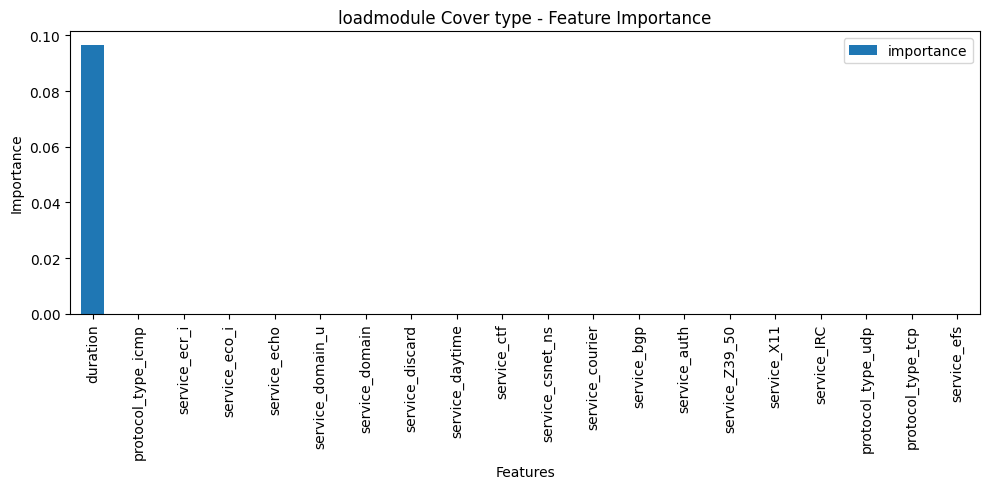

-----------------------------------------------------------------------------------------------




csv file httptunnel.csv
importances [2.51640262e-03 0.00000000e+00 6.55621830e-04 3.97942489e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.01468396e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.44587516e-04 1.08962912e-03 2.78122858e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.95793896e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.36881676e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.17816092e-05 0.00000000e+00
 0.0000000

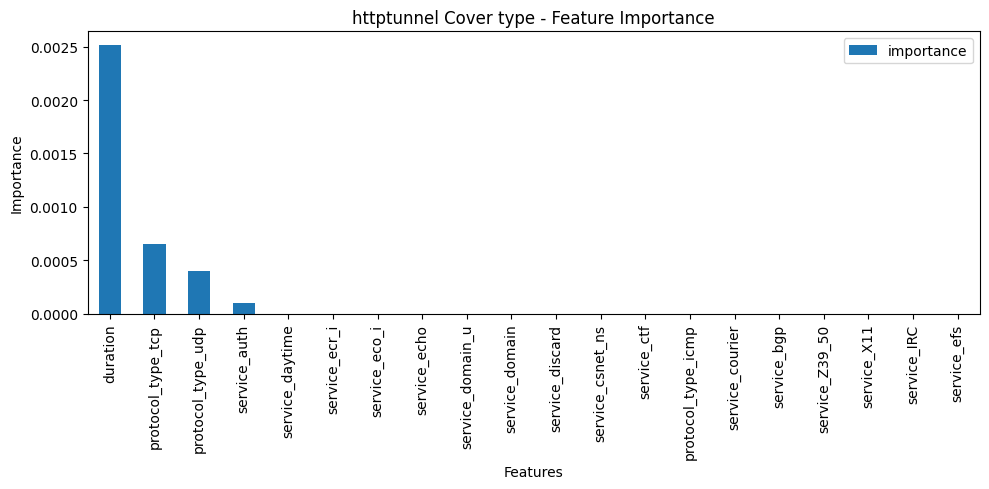

-----------------------------------------------------------------------------------------------




csv file mscan.csv
importances [0.00000000e+00 0.00000000e+00 3.12896496e-03 3.10879429e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.81976662e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.13518087e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.60793908e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.98521669e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.64837020e-03 9.16959585e-03 0.00000000e+00
 1.30937659e-05 0.00000000e+00 1.19538151e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.03173818e-02 0.00000000e+00
 0.00000000e+00

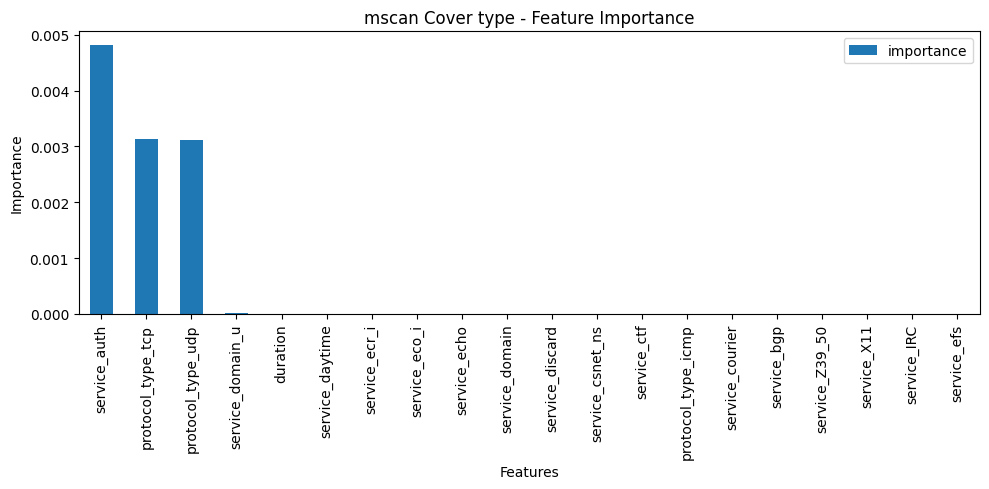

-----------------------------------------------------------------------------------------------




csv file buffer_overflow.csv
importances [4.37835039e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.90912210e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.58864603e-02
 0.00000000e+00 0.00000000e+00 9.59006211e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.59231439e-04 0.00000000e+00
 0.00

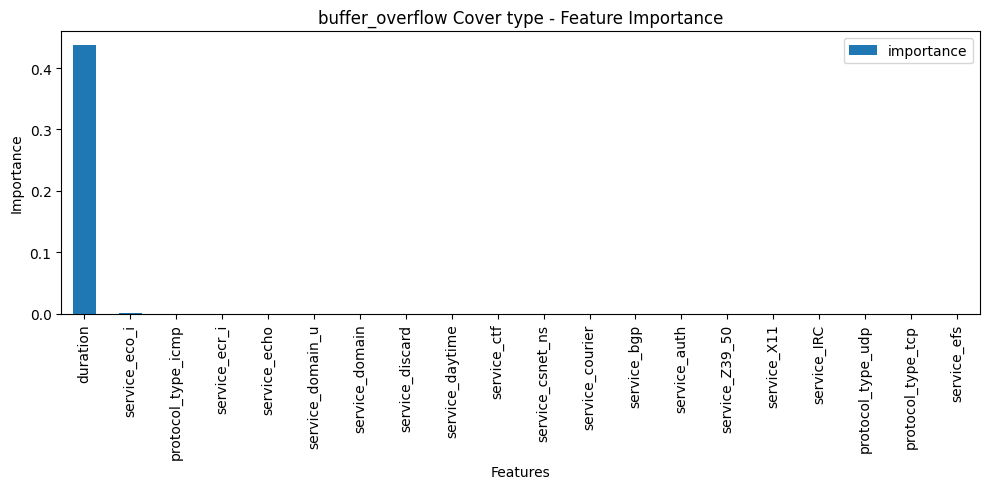

-----------------------------------------------------------------------------------------------




csv file sendmail.csv
importances [3.10212436e-02 0.00000000e+00 2.36456653e-02 1.10576202e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.91312217e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.82196970e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.85945871e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.38665465e-03 0.00000000e+00
 0.00000000e

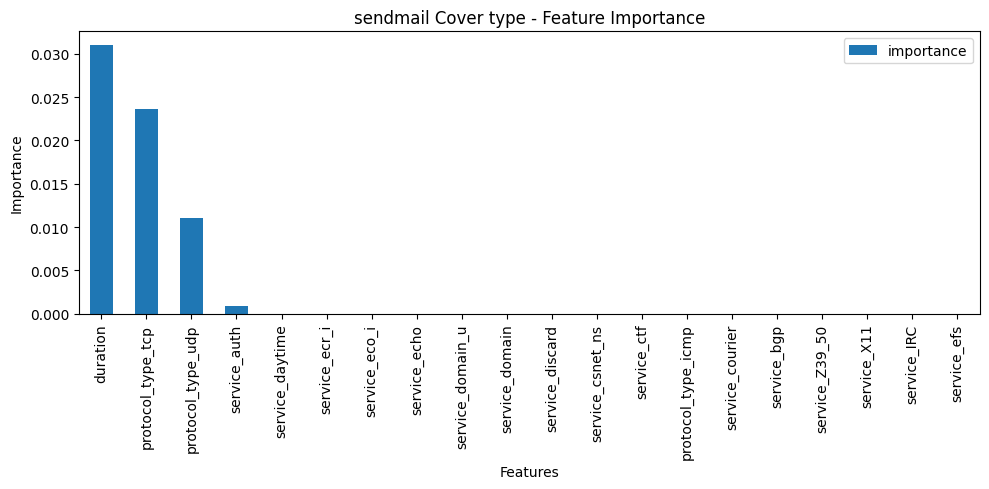

-----------------------------------------------------------------------------------------------




csv file imap.csv
importances [0.05660377 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1572327
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.13207547
 0.         0.         0.         0.         0.         0.
 0.13207547 0.         0.06289308 0.         0.         0.
 0.         0.         0.    

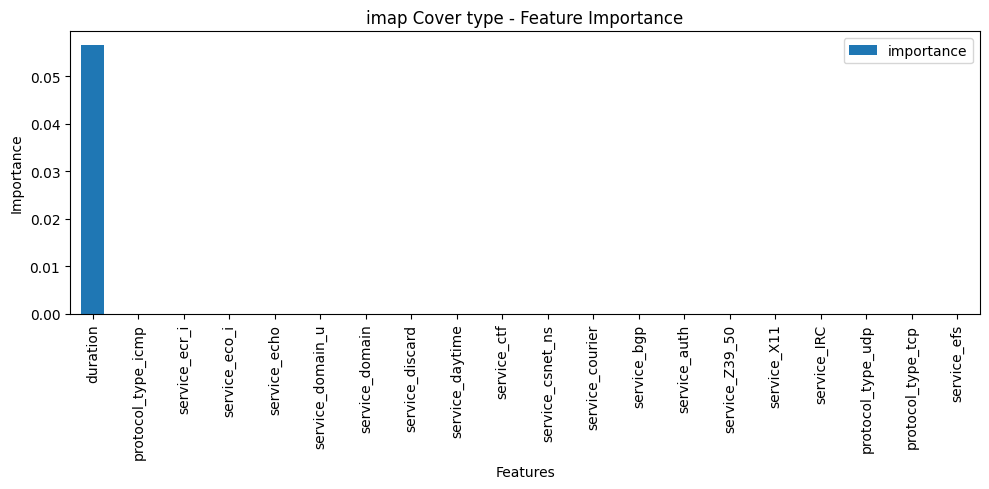

-----------------------------------------------------------------------------------------------




csv file back.csv
importances [2.78899051e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.72170323e-05
 0.00000000e+00 0.00000000e+00 4.16797404e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.64472827e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.08821877e-05 0.00000000e+00
 0.00000000e+00 

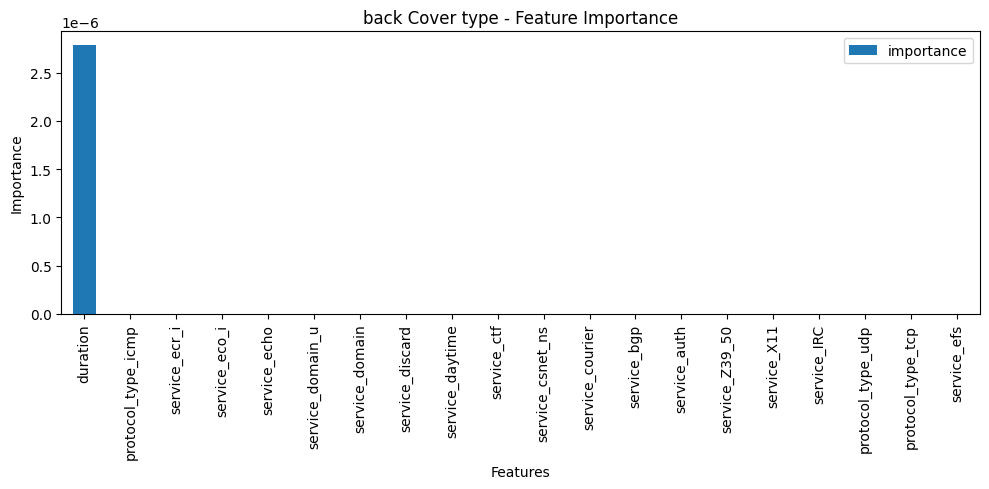

-----------------------------------------------------------------------------------------------




csv file smurf.csv
importances [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.96117865e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

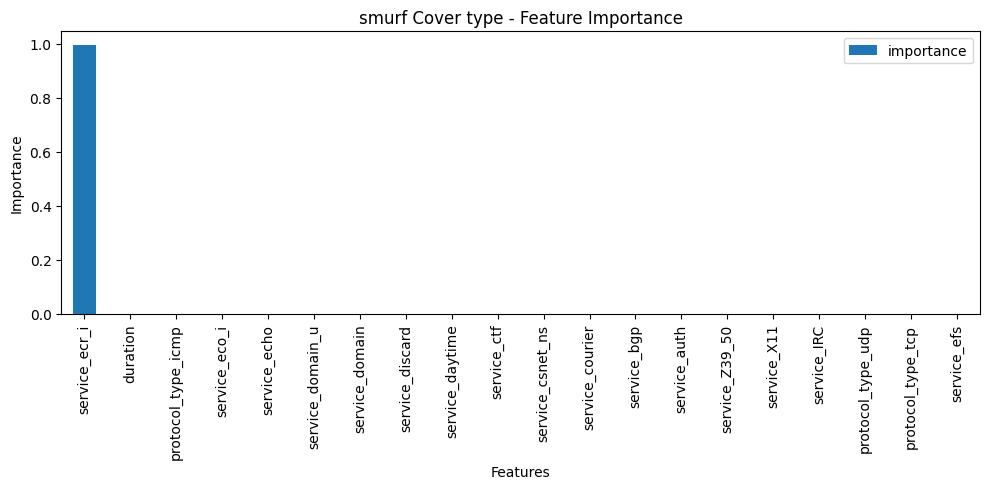

-----------------------------------------------------------------------------------------------




csv file ipsweep.csv
importances [0.00000000e+00 9.58449926e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.76860216e-03 9.42153478e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+

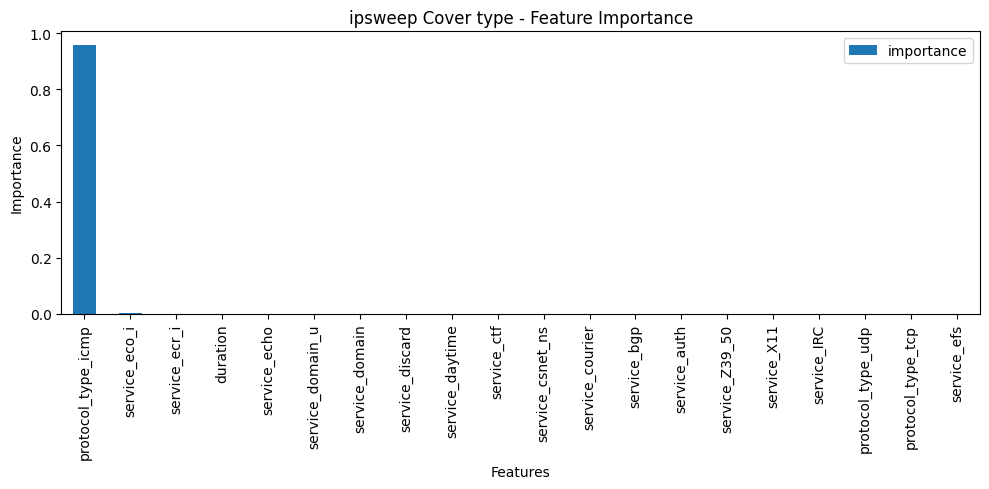

-----------------------------------------------------------------------------------------------




csv file udpstorm.csv
importances [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.06880734 0.         0.         0.
 0.         0.         0.         0.    

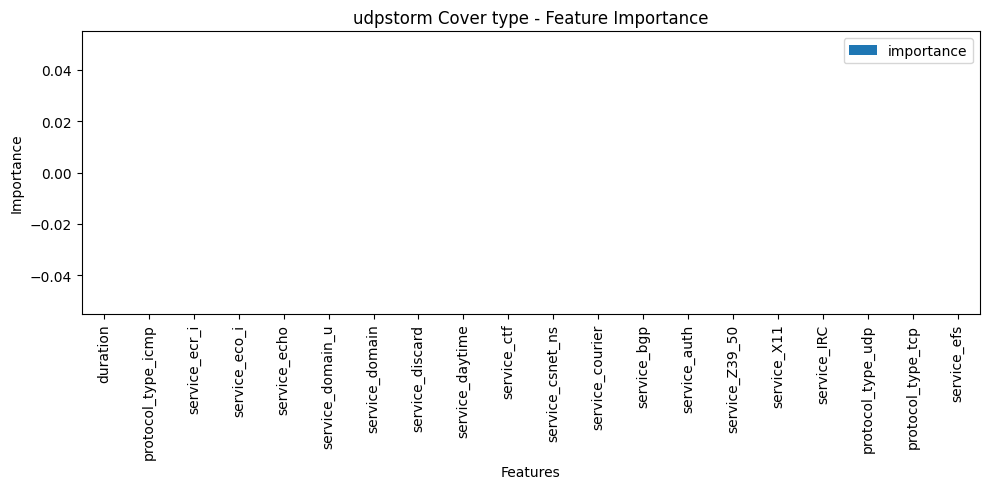

-----------------------------------------------------------------------------------------------




csv file ps.csv
importances [2.84422229e-01 0.00000000e+00 2.36463367e-03 1.92322787e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.62037037e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.54510463e-02 7.54387449e-04 2.36700571e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.73499970e-03 0.00000000e+00
 0.00000000e+00 0.

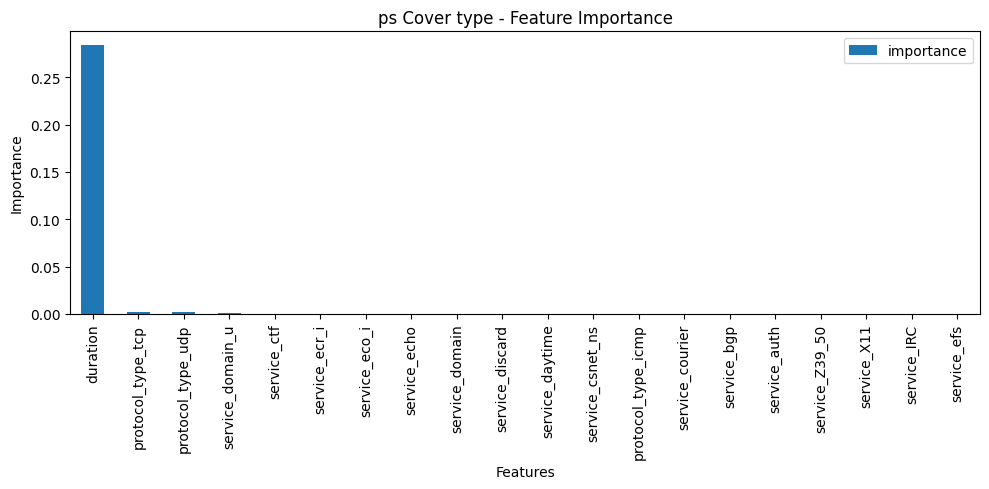

-----------------------------------------------------------------------------------------------




csv file neptune.csv
importances [1.06073722e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.53551336e-07 0.00000000e+00 0.00000000e+00 1.80384644e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.31623295e-07 0.00000000e+00 1.39579282e-06
 0.00000000e+00 0.00000000e+00 1.16838940e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.11419406e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.09140416e-06 0.00000000e+00
 0.00000000e+

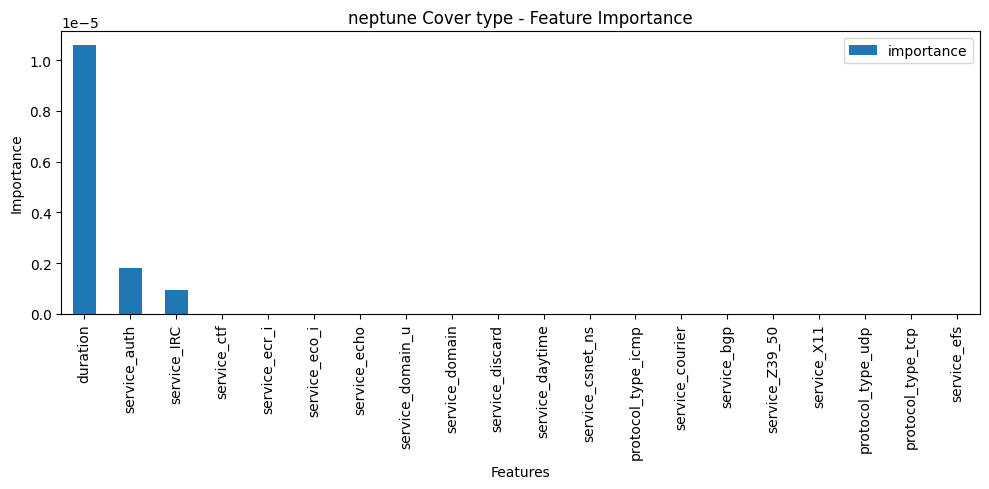

-----------------------------------------------------------------------------------------------




csv file teardrop.csv
importances [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.5   0.    0.    0.436
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.048 0.008 0.008 0.    0.    0.    0.    0.    0.   ] teardrop
important_features ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo']
teardrop importance list:
teardrop 
                     importa

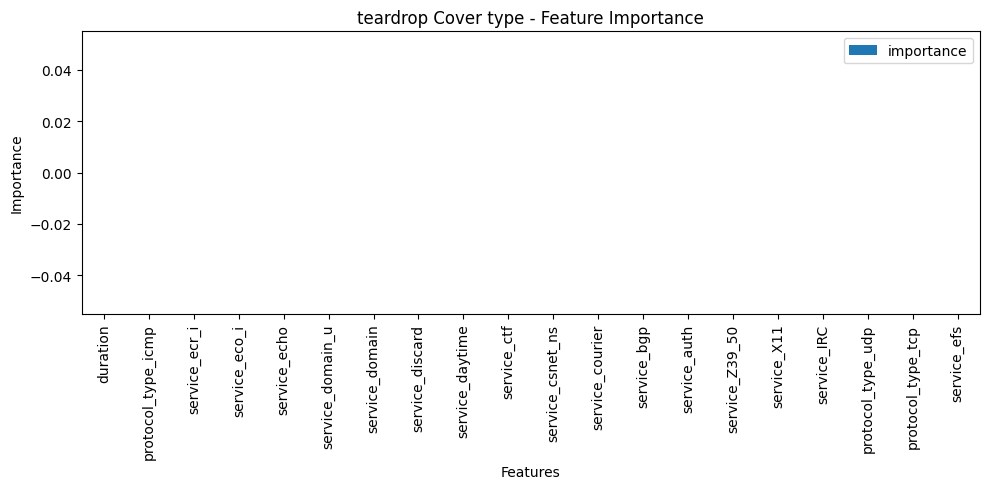

-----------------------------------------------------------------------------------------------




csv file pod.csv
importances [0.00000000e+00 9.78513655e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

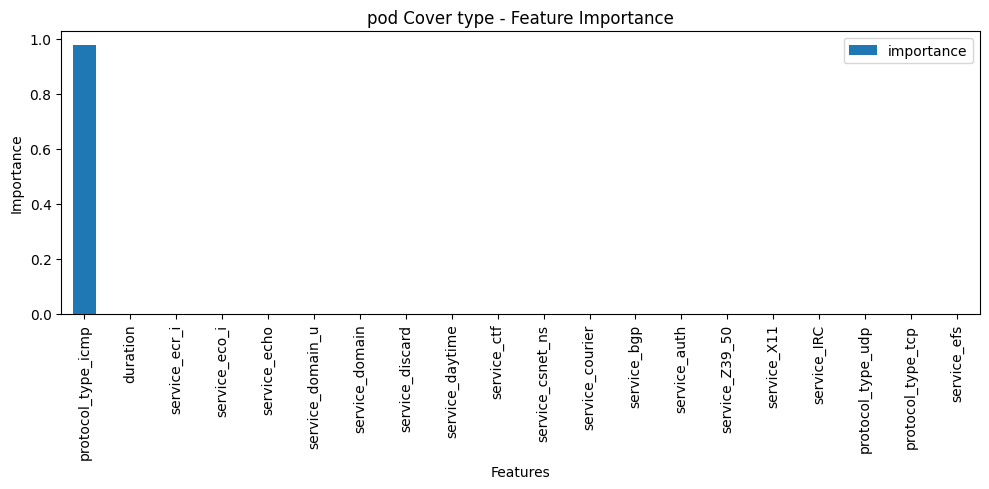

-----------------------------------------------------------------------------------------------




csv file warezmaster.csv
importances [1.21064307e-02 1.27672759e-05 2.64610555e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.08659370e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.82769989e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.03650644e-03 1.27274253e-03
 0.00000000e+00 0.00000000e+00 2.12451054e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.06687708e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.87894089e-02 0.00000000e+00
 0.000000

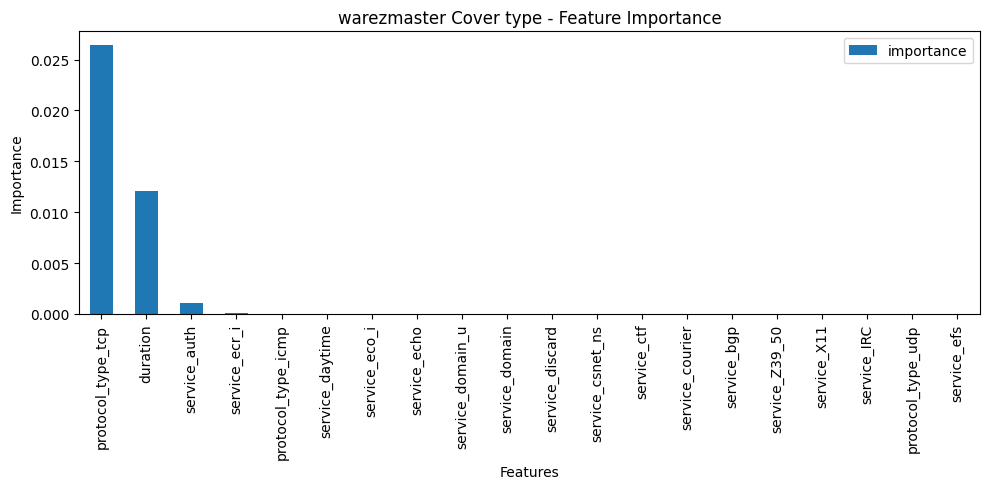

-----------------------------------------------------------------------------------------------




csv file named.csv
importances [2.40966714e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.37106918e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.97777778e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.78393352e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.70974400e-02 0.00000000e+00
 0.00000000e+00

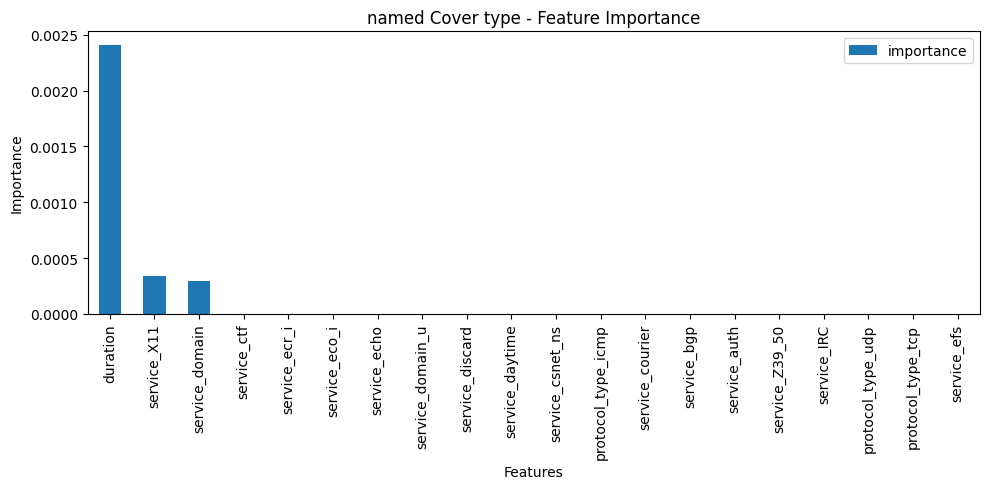

-----------------------------------------------------------------------------------------------




csv file xterm.csv
importances [1.19706597e-03 0.00000000e+00 6.70010246e-03 5.65950577e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.81939378e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.60000000e-04 5.09090909e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.40090498e-04 0.00000000e+00
 0.00000000e+00

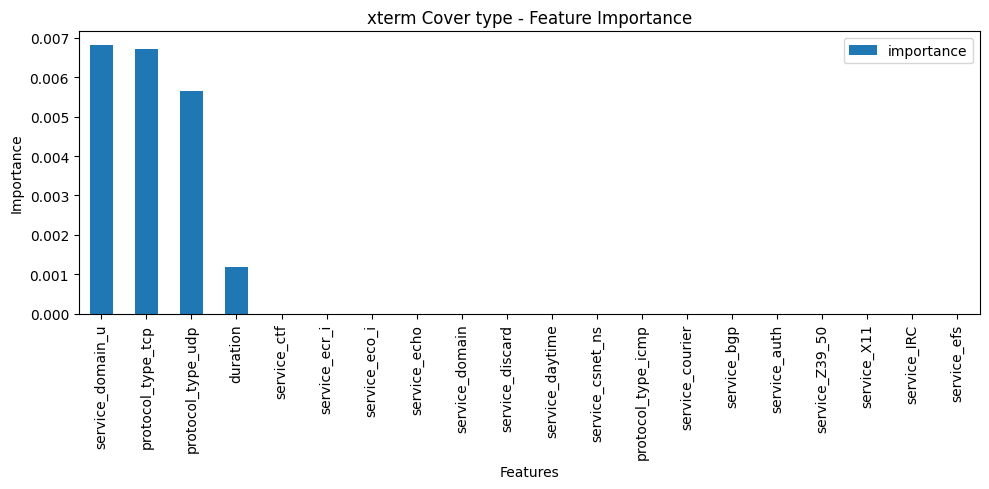

-----------------------------------------------------------------------------------------------




csv file snmpguess.csv
importances [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.90967704e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000

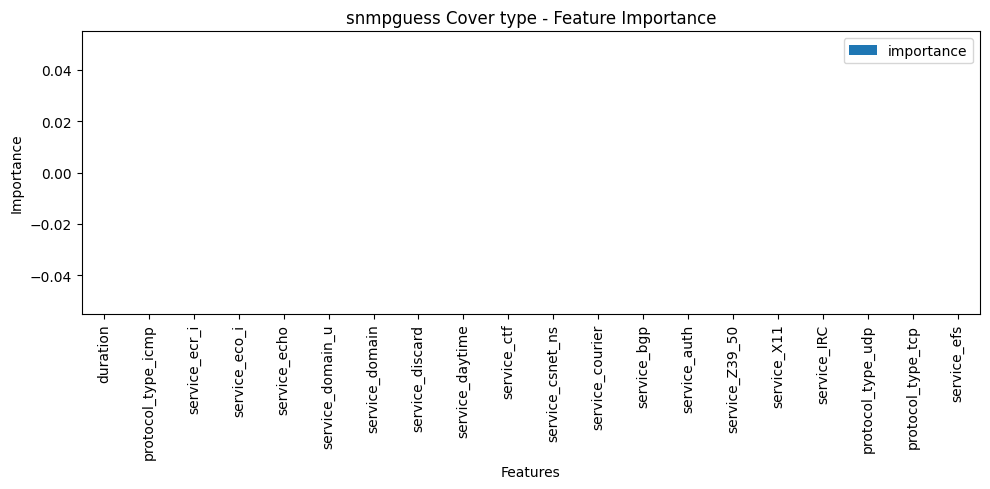

-----------------------------------------------------------------------------------------------




csv file xsnoop.csv
importances [0.19717252 0.         0.         0.         0.         0.03715726
 0.         0.0083465  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00813008 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00406504 0.         0.
 0.00107604 0.         0.00293131 0.00933026 0.         0.
 0.         0.00878339 0.         

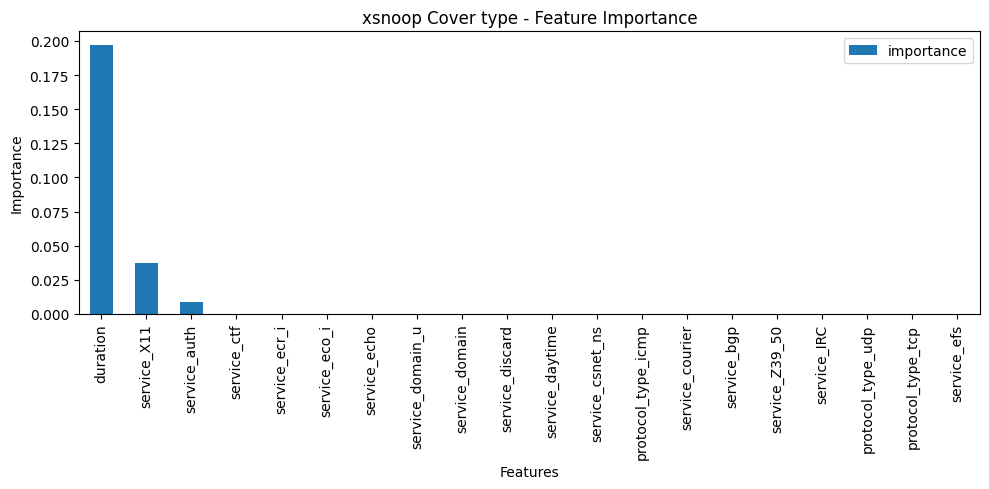

-----------------------------------------------------------------------------------------------




csv file rootkit.csv
importances [2.55808184e-02 0.00000000e+00 1.34878615e-03 2.80177887e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.92755728e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.18238278e-03 9.26428635e-03
 0.00000000e+00 0.00000000e+00 1.36994475e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+

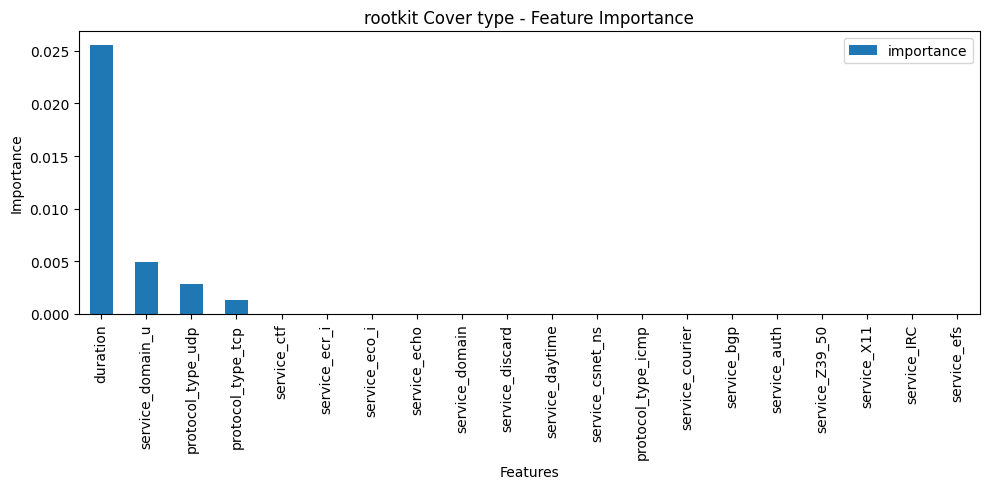

-----------------------------------------------------------------------------------------------




csv file ftp_write.csv
importances [0.07264957 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01282051 0.03418803
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02991453
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02136752 0.00854701 

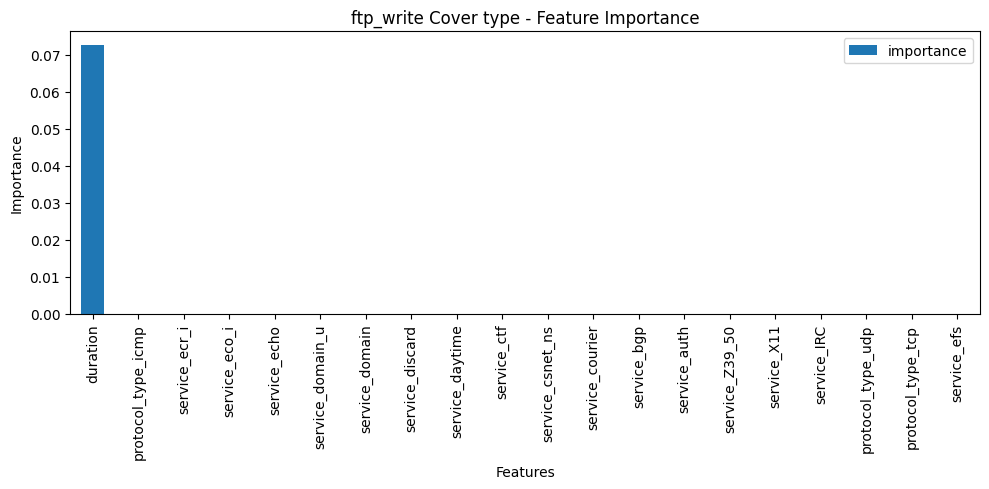

-----------------------------------------------------------------------------------------------




csv file snmpgetattack.csv
importances [4.37956471e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.08139041e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.49049914e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.0000

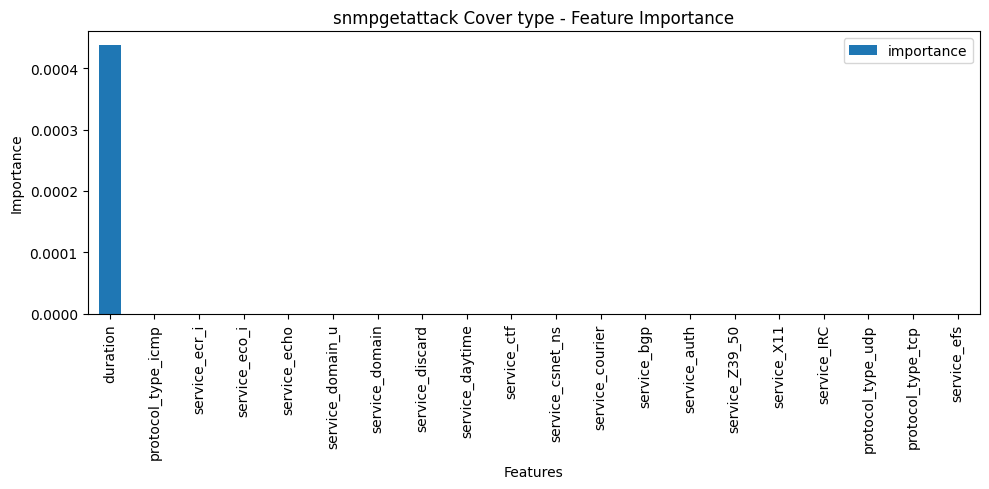

-----------------------------------------------------------------------------------------------




csv file saint.csv
importances [5.36063881e-05 4.20182933e-05 0.00000000e+00 4.07742206e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.22981188e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.88283520e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.79470975e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.14680936e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.35538541e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.53590598e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.10312883e-03 0.00000000e+00
 0.00000000e+00

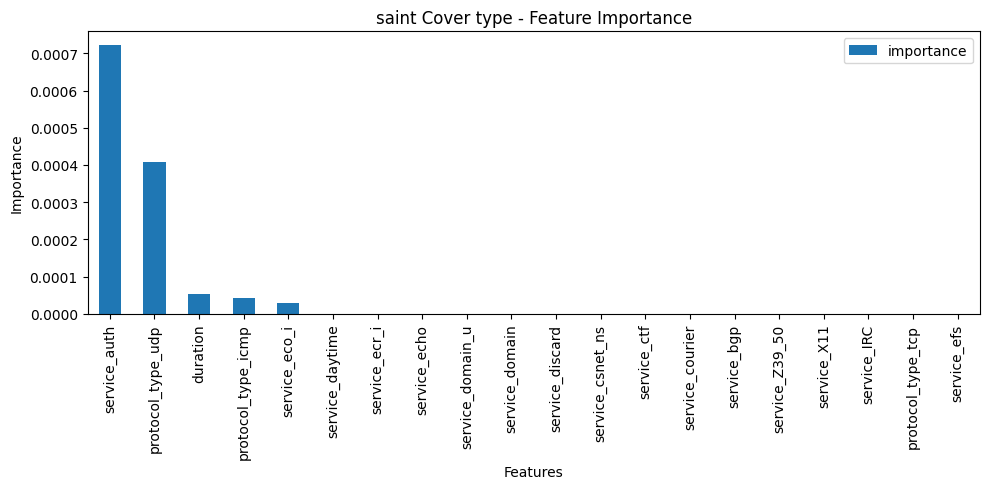

-----------------------------------------------------------------------------------------------




csv file sqlattack.csv
importances [0.10648148 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.09722222 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.07407407 0.07407407 0.         0.   

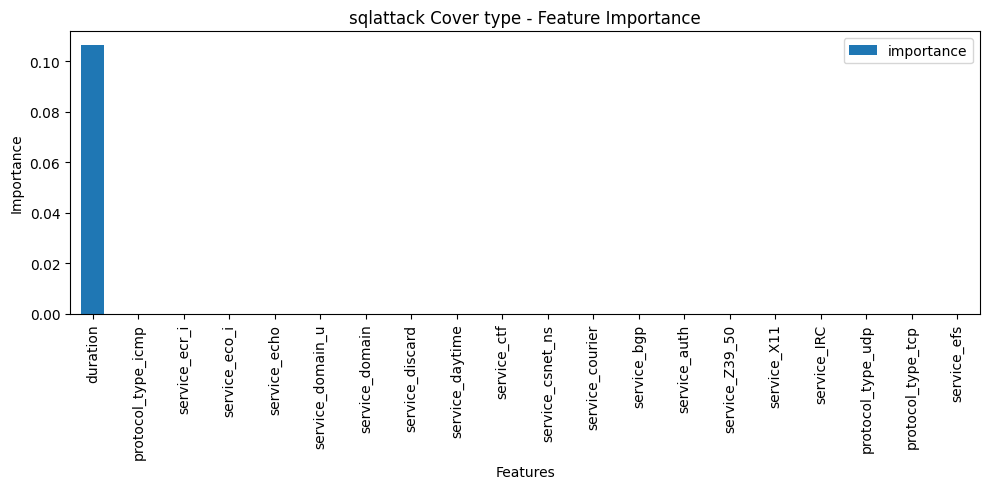

-----------------------------------------------------------------------------------------------




csv file land.csv
importances [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.076 0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.12  0.    0.    0.    0.116 0.    0.124 0.    0.108 0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.1   0.14  0.    0.    0.    0.    0.    0.
 0.04  0.004 0.    0.    0.    0.024 0.148 0.    0.   ] land
important_features ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo']
land importance list:
land 
                     importance
Features       

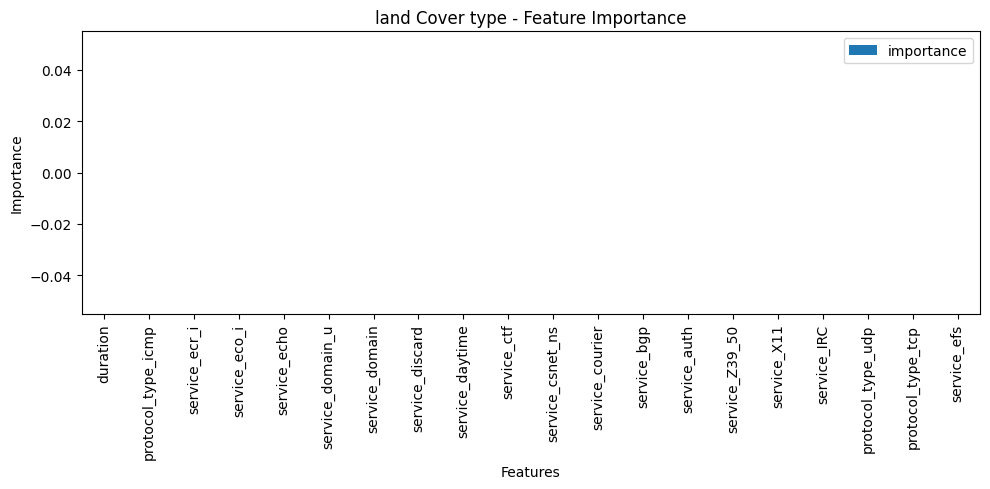

-----------------------------------------------------------------------------------------------




csv file perl.csv
importances [0.15023474 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.15023474 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

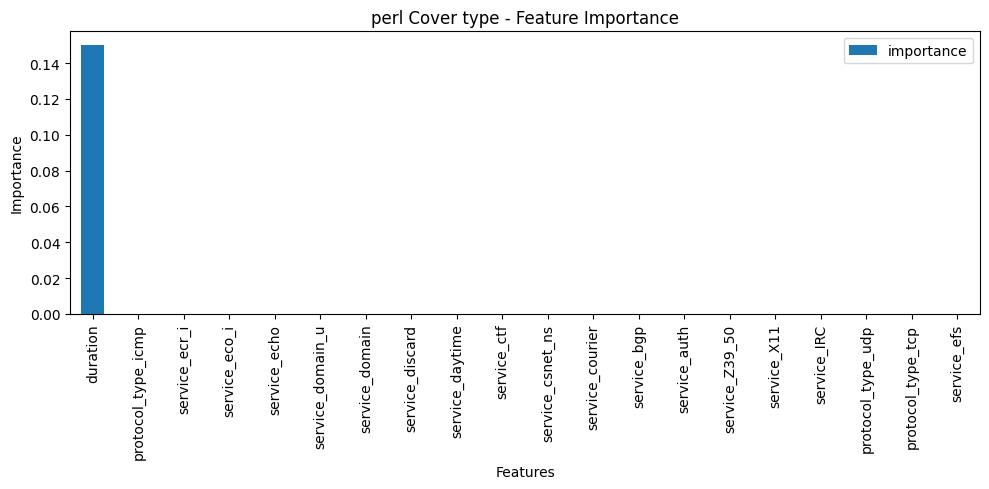

-----------------------------------------------------------------------------------------------




csv file apache2.csv
importances [2.35655603e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.26910888e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.27925451e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.22491835e-04 0.00000000e+00
 0.00000000e+

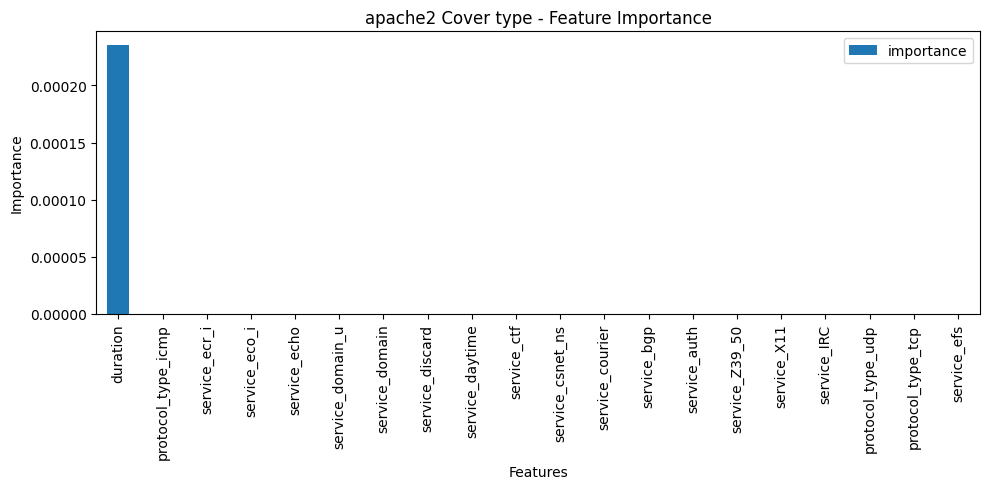

-----------------------------------------------------------------------------------------------




csv file guess_passwd.csv
importances [3.09651773e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.70037395e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

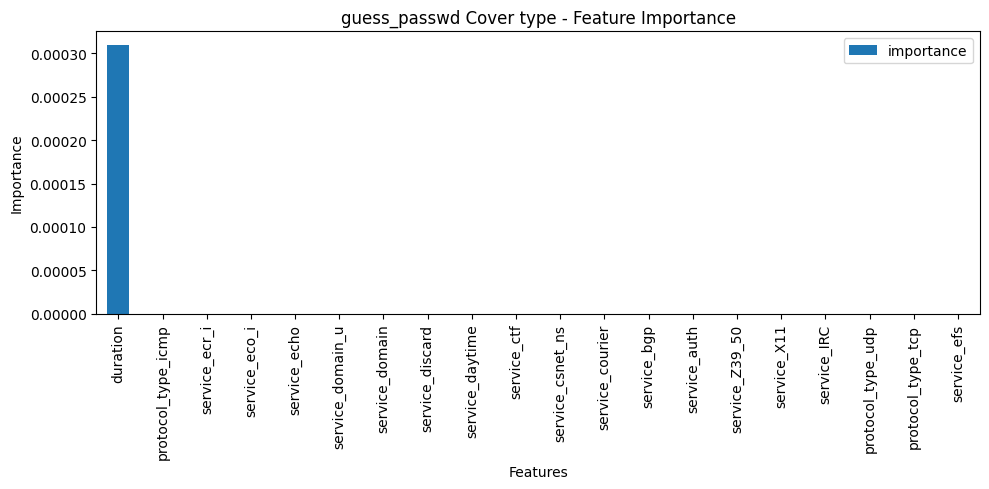

-----------------------------------------------------------------------------------------------




csv file xlock.csv
importances [7.28725225e-01 0.00000000e+00 1.32990477e-02 1.24849788e-02
 1.62072901e-03 6.13327117e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.28395062e-04
 0.00000000e+00 0.00000000e+00 3.66459627e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.18127858e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06019766e-03 0.00000000e+00
 0.00000000e+00

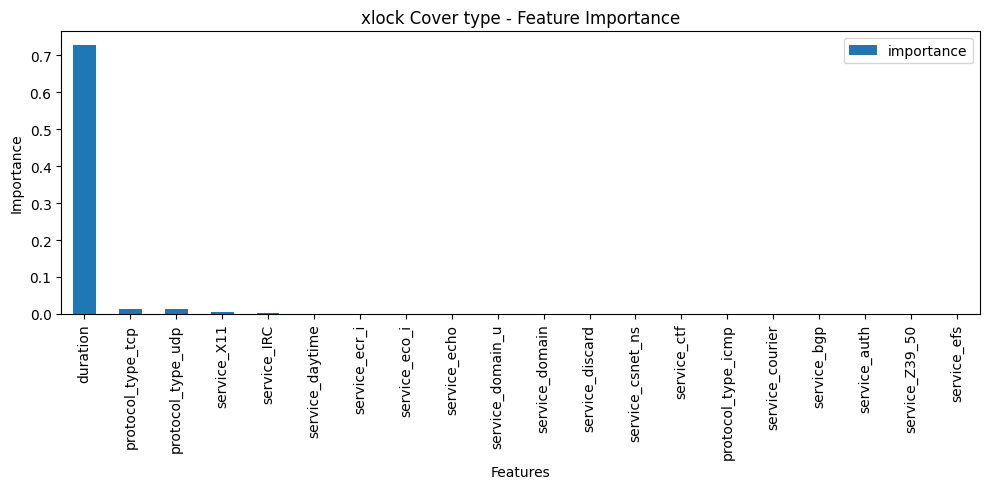

-----------------------------------------------------------------------------------------------




csv file nmap.csv
importances [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.076 0.088 0.12  0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.096 0.096 0.    0.    0.    0.    0.    0.
 0.128 0.004 0.112 0.108 0.    0.092 0.08  0.    0.   ] nmap
important_features ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo']
nmap importance list:
nmap 
                     importance
Features       

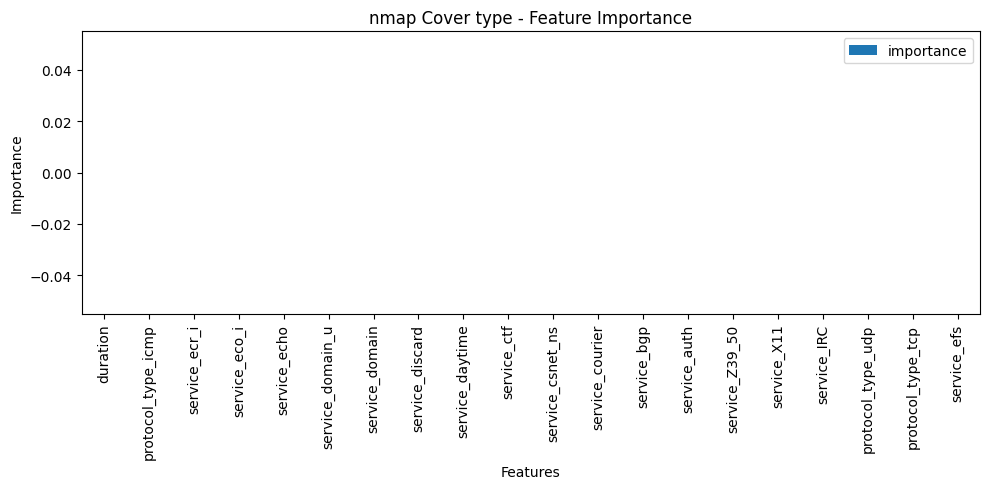

-----------------------------------------------------------------------------------------------




csv file worm.csv
importances [0.30434783 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.26086957 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.29951691 0.02415459 0.         0.
 0.         0.         0.         0.        

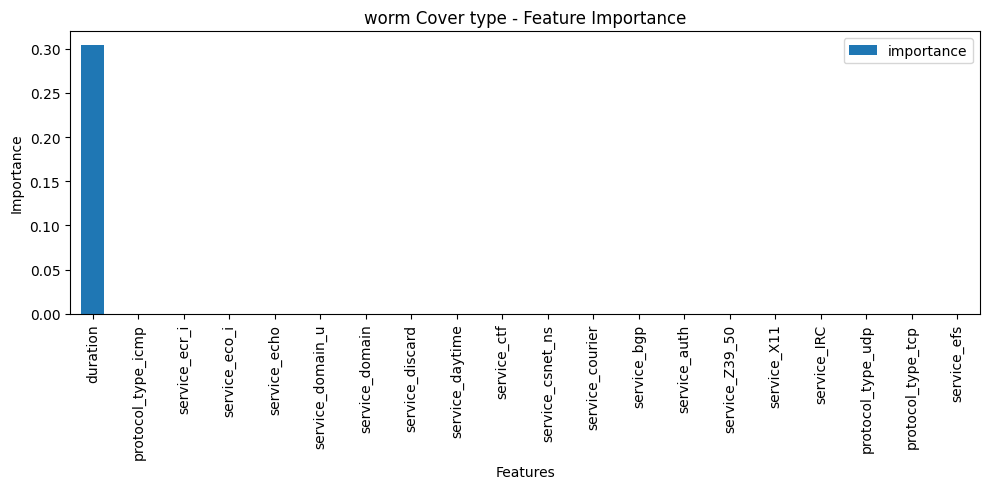

-----------------------------------------------------------------------------------------------




csv file multihop.csv
importances [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] multihop
important_features ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo']
multihop importance list:
multihop 
                     importance
Features                      
duration                   0.0
protocol_type_icmp         0.0
service_ecr_i              0.0
service_eco_i              0.0
service_echo               0.0
service_domain_u           0.0
service_domain             0.0
service_discard            0.0
service_daytime            0.0
service_ctf       

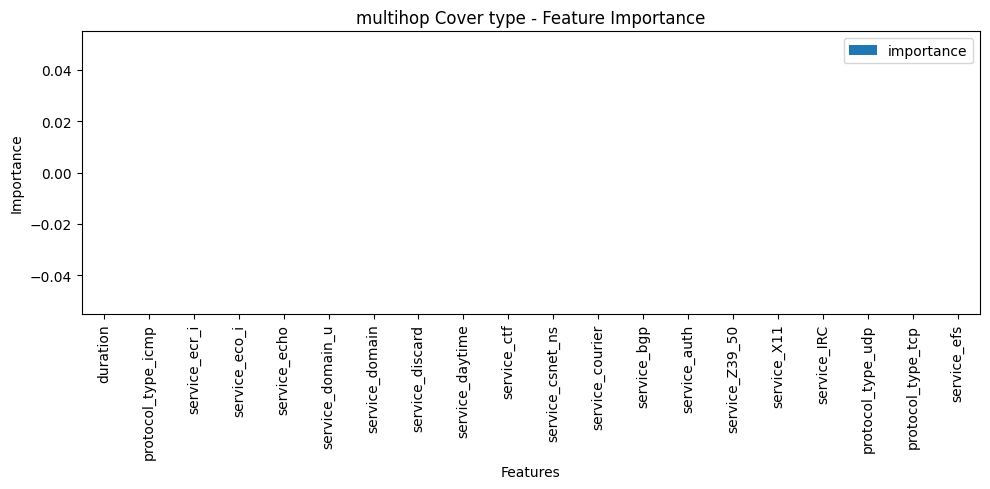

-----------------------------------------------------------------------------------------------




csv file satan.csv
importances [2.77841392e-06 3.13262700e-05 1.65239942e-04 2.12289544e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.25606412e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.87001776e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.35070509e-04
 0.00000000e+00 5.20519595e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.57062924e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00

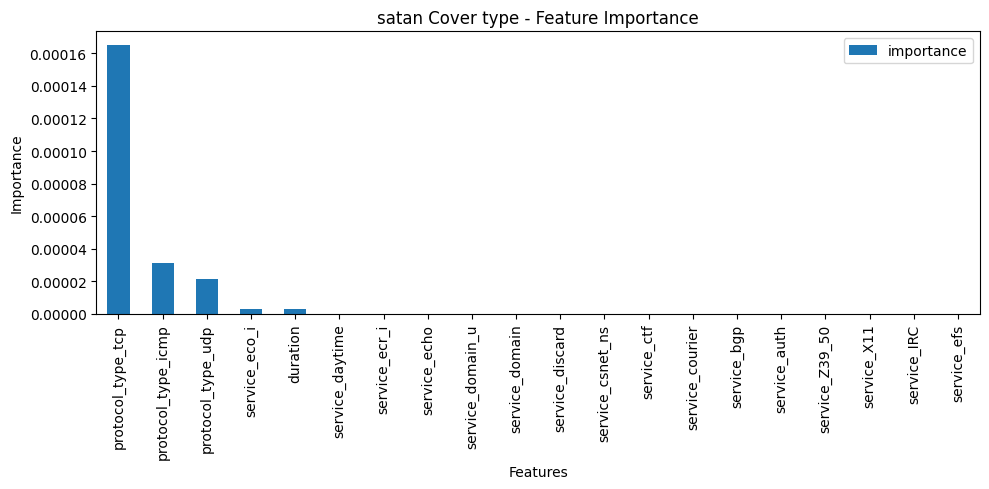

-----------------------------------------------------------------------------------------------




csv file mailbomb.csv
importances [1.19378825e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.20060131e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e

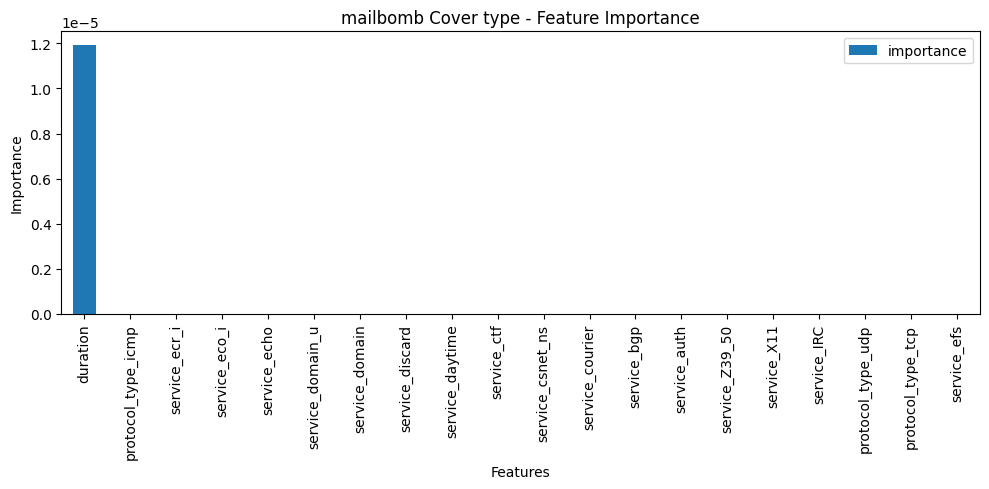

-----------------------------------------------------------------------------------------------




feature_importances {'portsweep': ['protocol_type_tcp', 'service_eco_i', 'protocol_type_icmp', 'duration', 'service_auth'], 'processtable': ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo'], 'phf': ['protocol_type_tcp', 'protocol_type_icmp', 'duration', 'service_ctf', 'service_ecr_i'], 'loadmodule': ['duration', 'protocol_type_icmp', 'service_ecr_i', 'service_eco_i', 'service_echo'], 'httptunnel': ['duration', 'protocol_type_tcp', 'protocol_type_udp', 'service_auth', 'service_daytime'], 'mscan': ['service_auth', 'protocol_type_tcp', 'protocol_type_udp', 'service_domain_u', 'duration'], 'buffer_overflow': ['duration', 'service_eco_i', 'protocol_type_icmp', 'service_ecr_i', 'service_echo'], 'sendmail': ['duration', 'protocol_type_tcp', 'protocol_type_udp', 'service_auth', 'service_daytime'], 'imap': ['duration', 'protocol_type_icmp', 'service_ecr_i', 'ser

In [73]:
seconds = time.time()

# CSV files names:
csv_files=os.listdir(OUTPUT_FOLDER)# It creates a list of file names in the "attacks" folder.
print('csv_files',csv_files)

ths = open("importance_list.csv", "w")
feature_importances = {}
SVMs = {}
for csv_file in csv_files:
    print('csv file', csv_file)
    
    X_df, y_df, df = get_anomaly_X_y_from_csv(csv_file, main_labels, TARGET_COLUMN, NORMAL_TARGET, OUTPUT_FOLDER)

    #computing the feature importances
    forest = sk.ensemble.RandomForestRegressor(n_estimators=250,random_state=0)
    forest.fit(X_df, y_df)
    importances = forest.feature_importances_
    label = csv_file.split(".")[0]
    print('importances', importances, label)
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    refclasscol=list(df.columns.values)
    impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})
    impor_bars = impor_bars.sort_values('importance',ascending=False)
    important_features = impor_bars['Features'].to_list()[:5]
    impor_bars = impor_bars.set_index('Features')
    print('important_features', important_features)
    feature_importances[label] = important_features

    X_scaled_df = X_df.copy()
    X_scaled_df[NUMERICAL_COLUMNS] = scaler.transform(X_scaled_df[NUMERICAL_COLUMNS])

    svm = SVC()
    X_train_class = df.iloc[:, df.columns.get_indexer(important_features)]
    # print('X_train_class', X_train_class)
    y_train_class = y_df
    # print('y_train_class', y_train_class)
    if len(y_train_class) > 0:  # Ensure there are samples for this class
        svm.fit(X_train_class, y_train_class)
    else:
        print(f'no data for {label}')
    SVMs[label] = svm

    
    plt.rcParams['figure.figsize'] = (10, 5)
    impor_bars.plot.bar();
    #printing the feature importances  
    count=0
    fea_ture=label+"=["
    for i in impor_bars.index:
        fea_ture=fea_ture+"\""+str(i)+"\","
        count+=1
        if count==5:
            fea_ture=fea_ture[0:-1]+"]"
            break     
    print(label,"importance list:")
    print(label,"\n",impor_bars.head(20),"\n\n\n")
    print(fea_ture)
    plt.title(label+" Cover type - Feature Importance")
    plt.ylabel('Importance')
    plt.savefig(os.path.join(FEATURE_FOLDER, label+".pdf"),bbox_inches='tight', format = 'pdf')
    ths.write((  fea_ture ) )
    plt.tight_layout()
    plt.show()
    print("-----------------------------------------------------------------------------------------------\n\n\n\n")

print('feature_importances', feature_importances)
print("Total operation time: = ",time.time()- seconds ,"seconds")
ths.close()


In [74]:
seconds = time.time()

# Step 1: Train KNN to classify
knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled_df, y_train_df)
knn.fit(X_train_df, y_train_df)

# Step 2: Predict classes for the test set
X_test_df = X_test_df[:TEST_COUNT]
X_test_scaled_df = X_test_scaled_df[:TEST_COUNT]
y_test_df = y_test_df[:TEST_COUNT]

# knn_predictions = knn.predict(X_test_scaled)
knn_predictions = knn.predict(X_test_df)
print('knn_predictions', knn_predictions)

print("Total operation time: = ",time.time()- seconds ,"seconds")

knn_predictions [27 14 27 16 27 16 16 14 16 27 27 27 14 27 27 16 27 14 16 14 27 14 16 14
 14 27 14 27 16 27 14 27 14 27 27 27 16  4 16 16 27 27 14 27 27 27 27 27
 27 33 27 27 14  4 14 27 27 10 27 27 27 27 14  1 14 16 16 16 16 16 27 14
 16 27 27 16 27 14 27 14 27 29 16 27 16 14 27 27 14 16 16 14 27 27 27 14
 27 27 27 27 10 16 25 27 14 14 14 27 14 14 16 27 27 14 27 14 27  1 27 14
 16 27 16 27 14 33 27 27 27 27 16 16 16 10 28 27 16 27 14 14 27 14 16 14
 27 14 16 16 16 27 27 27 14 27 14 27 16 27 27 27 27 27 27 27 27 27 27 16
 16 16 27 27 14 16 27 27 14 27 27 14 27 16 16 27 14 27 27 27 16 16 11 27
 14 16 28 27 14 27 14 16 16 27 27 16 27 27 14 16 16 27  4 27 16 27 14 16
 27 27 14 16 27 27 27 27 27  4 16 14 16 16 16 14 14 27 27 27 27 16 27 27
 16 16 16 16 16 16 16 27 16 14 14 14 29 27 27 27 27 14 16  0 27 16 16 16
 27 16 27 27 14  4 16 27 27 27 27 16 27 16 27 27 14 27 27 27 27 27 27 16
 27 27 27 27 14 27 27 27 27 27 16 14 24 27 27 27 27 16 14 27 14 27  4 14
 16 27 14 16 27 27 28 11 16 27 14 1

In [75]:
evaluate(y_test_df, knn_predictions, heading='-----KNN Evaluation-----')

-----KNN Evaluation-----
Confusion Matrix:
[[  1   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 104   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0 119   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 235   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        

In [76]:
svm_predictions = []
seconds = time.time()

for i in range(len(X_test_scaled_df)):
    test_instance_df = X_test_scaled_df.iloc[i].to_frame().T
    if knn_predictions[i] == NORMAL_TARGET:
        svm_predictions.append((0, NORMAL_TARGET, y_test_df.iloc[i]))
        continue
    predicted_label = TARGET_DICT[knn_predictions[i]]
    # print('predicted_label', predicted_label)
    selected_features = feature_importances[predicted_label]
    # print('selected_features', selected_features)
    svm_model = SVMs[predicted_label]
    
    # Select features for the SVM
    test_instance_selected_df = test_instance_df[selected_features]
    svm_prediction = svm_model.predict(test_instance_selected_df)
    print('svm prediction: ', svm_prediction, 'knn prediction: ', INV_TARGET_DICT[predicted_label], 'actual value: ', y_test_df.iloc[i])
    svm_predictions.append((svm_prediction, INV_TARGET_DICT[predicted_label], y_test_df.iloc[i]))

print("Total operation time: = ",time.time()- seconds ,"seconds")

svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [0] knn prediction:  27 actual value:  27
svm prediction:  [1] knn prediction:  14 actual value:  14
svm prediction:  [1] knn prediction:  14 actual value:  

In [77]:
# Now evaluate SVM predictions only for the anomalies detected by KNN
# Create a mask for test instances that KNN classified as anomalies
anomaly_mask = knn_predictions != NORMAL_TARGET  # Assuming normal_target is your normal class
print('anomaly_mask', len(anomaly_mask))

# Get true labels and predictions for anomalies
svm_predictions_actual = [t[1] for t in svm_predictions]
print(svm_predictions_actual)
# svm_predictions_actual = np.array(svm_predictions_actual)
svm_predictions_actual_df = pd.DataFrame(svm_predictions_actual, columns=[TARGET_COLUMN])
y_test_anomalies_df = y_test_df[anomaly_mask]
svm_predictions_anomalies_df = svm_predictions_actual_df[anomaly_mask]
print('Lengths: ', len(y_test_anomalies_df), len(svm_predictions_anomalies_df))

# Evaluate SVM only on the anomalies
evaluate(y_test_anomalies_df, svm_predictions_anomalies_df, heading='SVM Evaluation (for anomalies)')

anomaly_mask 500
[27, 14, 27, 16, 27, 16, 16, 14, 16, 27, 27, 27, 14, 27, 27, 16, 27, 14, 16, 14, 27, 14, 16, 14, 14, 27, 14, 27, 16, 27, 14, 27, 14, 27, 27, 27, 16, 4, 16, 16, 27, 27, 14, 27, 27, 27, 27, 27, 27, 33, 27, 27, 14, 4, 14, 27, 27, 10, 27, 27, 27, 27, 14, 1, 14, 16, 16, 16, 16, 16, 27, 14, 16, 27, 27, 16, 27, 14, 27, 14, 27, 29, 16, 27, 16, 14, 27, 27, 14, 16, 16, 14, 27, 27, 27, 14, 27, 27, 27, 27, 10, 16, 25, 27, 14, 14, 14, 27, 14, 14, 16, 27, 27, 14, 27, 14, 27, 1, 27, 14, 16, 27, 16, 27, 14, 33, 27, 27, 27, 27, 16, 16, 16, 10, 28, 27, 16, 27, 14, 14, 27, 14, 16, 14, 27, 14, 16, 16, 16, 27, 27, 27, 14, 27, 14, 27, 16, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 16, 16, 16, 27, 27, 14, 16, 27, 27, 14, 27, 27, 14, 27, 16, 16, 27, 14, 27, 27, 27, 16, 16, 11, 27, 14, 16, 28, 27, 14, 27, 14, 16, 16, 27, 27, 16, 27, 27, 14, 16, 16, 27, 4, 27, 16, 27, 14, 16, 27, 27, 14, 16, 27, 27, 27, 27, 27, 4, 16, 14, 16, 16, 16, 14, 14, 27, 27, 27, 27, 16, 27, 27, 16, 16, 16, 16, 16, 16, 16, 

/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suyeetan/Downloads/CS5344_Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [78]:
evaluate(y_test_df, svm_predictions_actual_df, heading='SVM Evaluation (for all)')

SVM Evaluation (for all)
Confusion Matrix:
[[  1   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   6   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 104   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0 119   0   0   0   0   2   0   0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 235   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0   0   3   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        